**This notebook is used to visualize the 1-D training domain in the map with the coast line.**

In [1]:
## Import packages
#import Pkg
#Pkg.add("Plots")
using Plots
#Pkg.add("BenchmarkTools")
using BenchmarkTools
#Pkg.add("NCDatasets")
using NCDatasets
#Pkg.add("Flux")
using Flux
#Pkg.add("CSV")
using CSV
#Pkg.add("DelimitedFiles")
using DelimitedFiles
#Pkg.add("Statistics")
using Statistics
#Pkg.add("StatsBase")
using StatsBase
#Pkg.add("BSON")
using BSON: @save
using BSON: @load
#Pkg.add("Random")
using Random
#Pkg.add("GMT")
using GMT
#Pkg.add("ColorSchemes")
using ColorSchemes

In [3]:
## Generate the array to store the information of training domain
s11=zeros(201,224)

201×224 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [2]:
## Allocating the value on the lines used for training and testing
train = zeros(202,225)
train[118,:].=1 ## 39N - training
train[80,:].=0.3 ## 29.5N - generelization testing
train[142,:].=0.3 ## 45N - generelization testing
train[:,171].=0.3 ## Longitudinal - generelization testing

202-element view(::Matrix{Float64}, :, 171) with eltype Float64:
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 ⋮
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3
 0.3

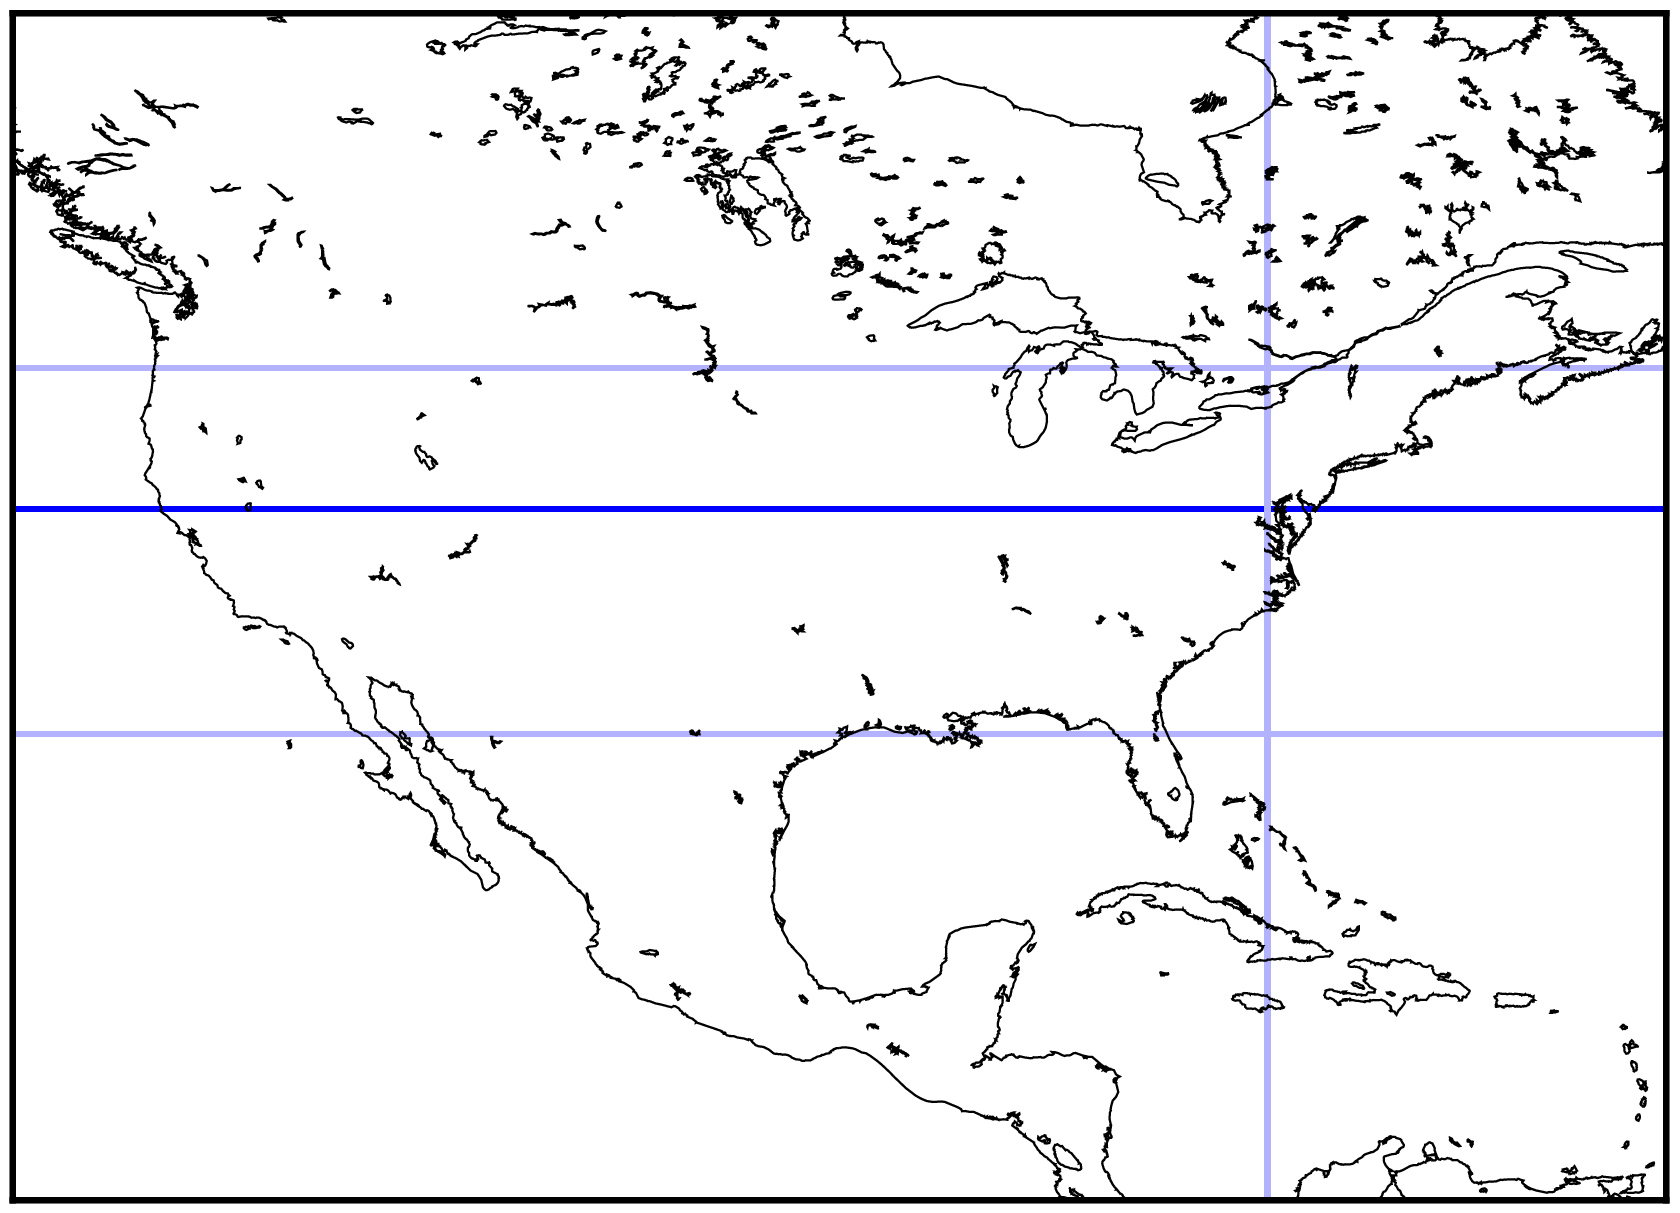

In [7]:
## Map visualization using GMT.jl
G = mat2grid(train, x = -130:0.3125:-60, y = 9.75:0.25:60)
topo = makecpt(cmap="blue,white", reverse=true, range=(0,1));
A = grdimage(G, frame=(annot=false,), color=topo, coast=true, show=true, colorbar=false, fmt=:pdf)
#savefig("map.pdf")